The purpose of this notebook is to conduct exploratory data analysis (EDA) on the non-pharmaceutical intervention dataset published by Keystone Strategy.  After such analysis, we would like to assess the possibility of including NPI data in our predictions of Covid cases.

# Notebook Set-up 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_url = 'https://raw.githubusercontent.com/Keystone-Strategy/covid19-intervention-data/master/complete_npis_raw_policies.csv'
raw_df = pd.read_csv(raw_url)

inherited_url = 'https://raw.githubusercontent.com/Keystone-Strategy/covid19-intervention-data/master/complete_npis_inherited_policies.csv'
df = pd.read_csv(inherited_url)

In [3]:
display(raw_df.shape)
display(raw_df.head().T)

display(df.shape)
display(df.head().T)

(4226, 8)

,0,1,2,3,4
fip_code,1,1,1,1,1
county,NaN,NaN,NaN,NaN,NaN
state,Alabama,Alabama,Alabama,Alabama,Alabama
npi,gathering_size_10_0,gathering_size_25_to_11,non-essential_services_closure,shelter_in_place,closing_of_public_venues
start_date,3/28/2020,3/19/2020,3/28/2020,4/4/2020,3/28/2020
end_date,NaN,NaN,NaN,NaN,NaN
citation,http://www.alabamapublichealth.gov/news/2020/0...,http://www.alabamapublichealth.gov/news/2020/0...,http://www.alabamapublichealth.gov/news/2020/0...,https://governor.alabama.gov/assets/2020/04/Fi...,http://www.alabamapublichealth.gov/news/2020/0...
note,max 10 people permitted if maintain 6 feet,NaN,T,outside rec is okay with proper social distan...,3/19/20 order only for restaurants to do take ...


(4226, 8)

,0,1,2,3,4
fip_code,1,1,1,1,1
county,NaN,NaN,NaN,NaN,NaN
state,Alabama,Alabama,Alabama,Alabama,Alabama
npi,gathering_size_10_0,gathering_size_25_to_11,non-essential_services_closure,shelter_in_place,closing_of_public_venues
start_date,3/28/2020,3/19/2020,3/28/2020,4/4/2020,3/28/2020
end_date,NaN,NaN,NaN,NaN,NaN
citation,http://www.alabamapublichealth.gov/news/2020/0...,http://www.alabamapublichealth.gov/news/2020/0...,http://www.alabamapublichealth.gov/news/2020/0...,https://governor.alabama.gov/assets/2020/04/Fi...,http://www.alabamapublichealth.gov/news/2020/0...
note,max 10 people permitted if maintain 6 feet,NaN,T,outside rec is okay with proper social distan...,3/19/20 order only for restaurants to do take ...


In [4]:
df.npi.unique()

array(['gathering_size_10_0', 'gathering_size_25_to_11',
       'non-essential_services_closure', 'shelter_in_place',
       'closing_of_public_venues', 'gathering_size_100_to_26',
       'gathering_size_500_to_101', 'lockdown',
       'religious_gatherings_banned', 'school_closure',
       'social_distancing', 'Other'], dtype=object)

In [5]:
df.fip_code.nunique()

384

# Reshape the Data

In [6]:
pivoted = pd.pivot_table(df, index = 'fip_code', columns = 'npi', values = 'start_date', aggfunc = 'min')
display(pivoted)

npi,Other,closing_of_public_venues,gathering_size_100_to_26,gathering_size_10_0,gathering_size_25_to_11,gathering_size_500_to_101,lockdown,non-essential_services_closure,religious_gatherings_banned,school_closure,shelter_in_place,social_distancing
fip_code,,,,,,,,,,,,
1,NaN,3/28/2020,3/16/2020,3/28/2020,3/19/2020,3/13/2020,NaN,3/28/2020,4/4/2020,3/20/2020,4/4/2020,4/3/2020
2,3/17/2020,3/18/2020,NaN,3/24/2020,NaN,NaN,NaN,3/28/2020,3/24/2020,3/16/2020,3/28/2020,3/28/2020
4,NaN,3/31/2020,NaN,NaN,NaN,NaN,NaN,3/31/2020,NaN,3/15/2020,3/31/2020,3/31/2020
5,NaN,3/20/2020,NaN,3/27/2020,NaN,NaN,NaN,4/6/2020,NaN,3/19/2020,NaN,3/27/2020
6,NaN,3/19/2020,NaN,3/16/2020,NaN,3/11/2020,NaN,3/19/2020,3/19/2020,3/19/2020,3/19/2020,3/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
53077,NaN,3/16/2020,3/16/2020,3/23/2020,NaN,3/11/2020,NaN,3/23/2020,3/23/2020,3/13/2020,3/23/2020,3/23/2020
55025,NaN,3/17/2020,3/17/2020,3/17/2020,NaN,3/14/2020,NaN,3/25/2020,3/14/2020,3/18/2020,3/25/2020,3/17/2020
55059,NaN,3/17/2020,3/17/2020,3/17/2020,NaN,NaN,NaN,3/25/2020,3/17/2020,3/18/2020,3/25/2020,3/17/2020


In this analysis, we are primarily concerned with state-level data as this is more easily merged with the Corona virus case data.  As a result, we will limit the dataset to Fips codes less than 100 (or less than 3 digits) so that we can observe NPI at the state-level.

In [7]:
state_lookup = pd.DataFrame(df.groupby('fip_code').state.max())

merged = pd.merge(pivoted[pivoted.index < 100], state_lookup['state'], right_index = True, left_index = True, how = 'left')

state_level = merged.set_index('state', drop = True)
state_level

,Other,closing_of_public_venues,gathering_size_100_to_26,gathering_size_10_0,gathering_size_25_to_11,gathering_size_500_to_101,lockdown,non-essential_services_closure,religious_gatherings_banned,school_closure,shelter_in_place,social_distancing
state,,,,,,,,,,,,
Alabama,NaN,3/28/2020,3/16/2020,3/28/2020,3/19/2020,3/13/2020,NaN,3/28/2020,4/4/2020,3/20/2020,4/4/2020,4/3/2020
Alaska,3/17/2020,3/18/2020,NaN,3/24/2020,NaN,NaN,NaN,3/28/2020,3/24/2020,3/16/2020,3/28/2020,3/28/2020
Arizona,NaN,3/31/2020,NaN,NaN,NaN,NaN,NaN,3/31/2020,NaN,3/15/2020,3/31/2020,3/31/2020
Arkansas,NaN,3/20/2020,NaN,3/27/2020,NaN,NaN,NaN,4/6/2020,NaN,3/19/2020,NaN,3/27/2020
California,NaN,3/19/2020,NaN,3/16/2020,NaN,3/11/2020,NaN,3/19/2020,3/19/2020,3/19/2020,3/19/2020,3/19/2020
Colorado,NaN,3/19/2020,NaN,3/19/2020,NaN,NaN,NaN,3/19/2020,NaN,3/23/2020,4/2/2020,3/19/2020
Connecticut,NaN,3/16/2020,3/16/2020,3/26/2020,NaN,3/12/2020,NaN,3/23/2020,3/16/2020,3/15/2020,3/20/2020,3/16/2020
Delaware,NaN,3/16/2020,3/18/2020,3/22/2020,NaN,NaN,NaN,3/24/2020,NaN,3/23/2020,3/24/2020,NaN
District of Columbia,NaN,3/16/2020,3/16/2020,3/25/2020,NaN,NaN,NaN,3/25/2020,3/25/2020,3/16/2020,4/1/2020,3/13/2020


In [8]:
state_level.columns.tolist()

['Other',
 'closing_of_public_venues',
 'gathering_size_100_to_26',
 'gathering_size_10_0',
 'gathering_size_25_to_11',
 'gathering_size_500_to_101',
 'lockdown',
 'non-essential_services_closure',
 'religious_gatherings_banned',
 'school_closure',
 'shelter_in_place',
 'social_distancing']

# Graphical Analysis

Other                              1.886792
lockdown                           1.886792
gathering_size_25_to_11           15.094340
gathering_size_500_to_101         24.528302
gathering_size_100_to_26          49.056604
religious_gatherings_banned       58.490566
social_distancing                 79.245283
shelter_in_place                  81.132075
gathering_size_10_0               84.905660
non-essential_services_closure    96.226415
closing_of_public_venues          98.113208
school_closure                    98.113208
dtype: float64

Text(0.5, 1.0, 'Percent of States Participating in each NPI')

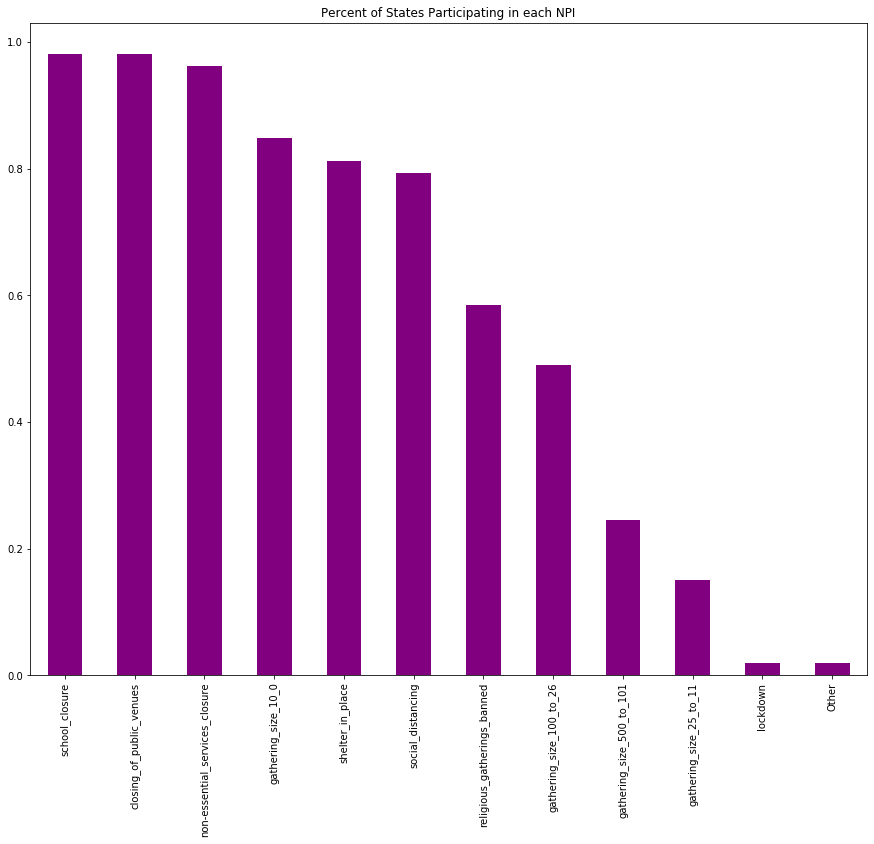

In [9]:
# Percent of states participating in each NPI

display((state_level.notnull().sum()/state_level.shape[0]).sort_values()*100)


plt.figure(figsize=(15,12))
(state_level.notnull().sum()/state_level.shape[0]).sort_values(ascending = False).plot(kind = 'bar', color='purple')
plt.title('Percent of States Participating in each NPI')


In [10]:
for col in state_level.columns.tolist():
    state_level[col] = pd.to_datetime(state_level[col], errors='coerce')
    
state_level.dtypes

Other                             datetime64[ns]
closing_of_public_venues          datetime64[ns]
gathering_size_100_to_26          datetime64[ns]
gathering_size_10_0               datetime64[ns]
gathering_size_25_to_11           datetime64[ns]
gathering_size_500_to_101         datetime64[ns]
lockdown                          datetime64[ns]
non-essential_services_closure    datetime64[ns]
religious_gatherings_banned       datetime64[ns]
school_closure                    datetime64[ns]
shelter_in_place                  datetime64[ns]
social_distancing                 datetime64[ns]
dtype: object

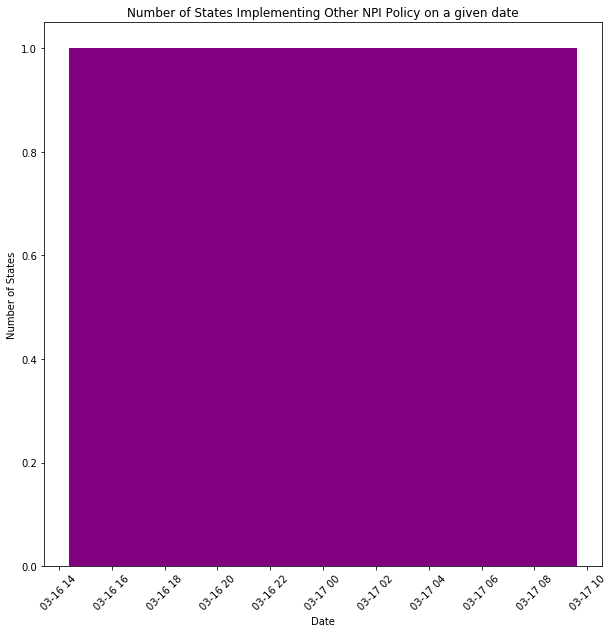

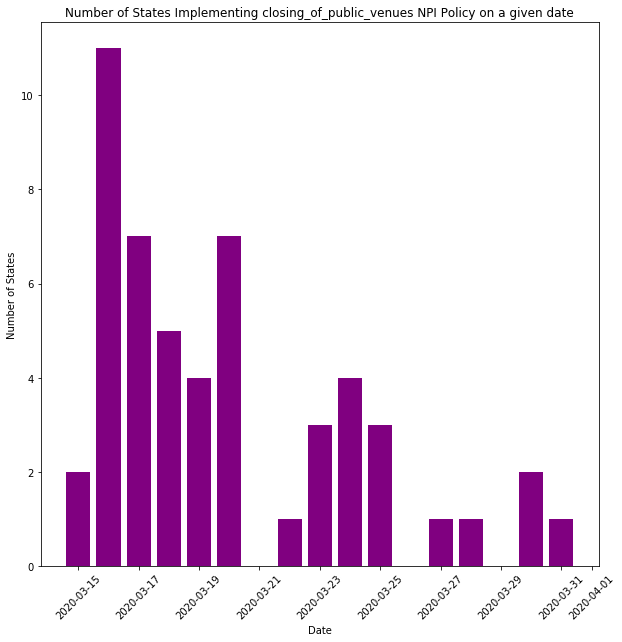

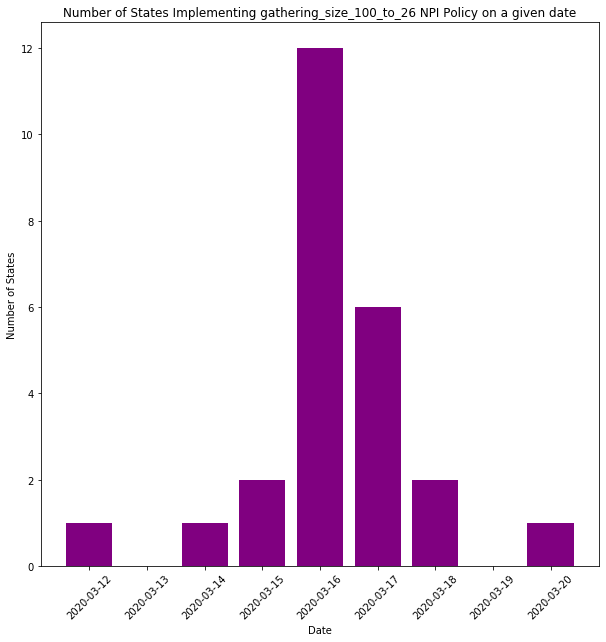

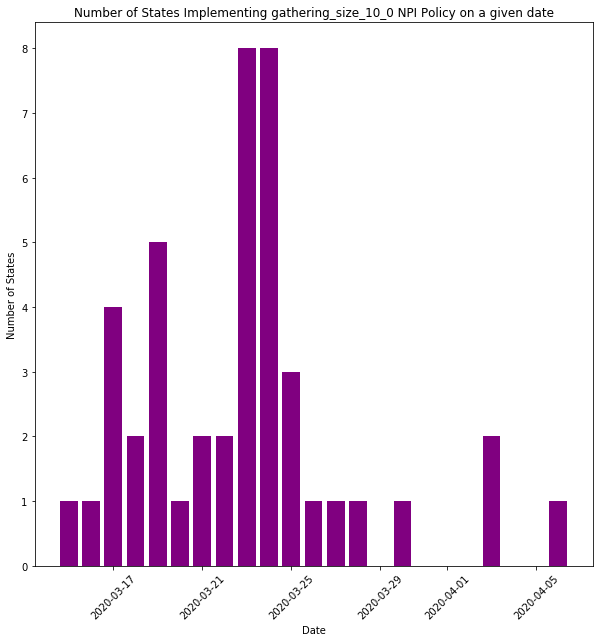

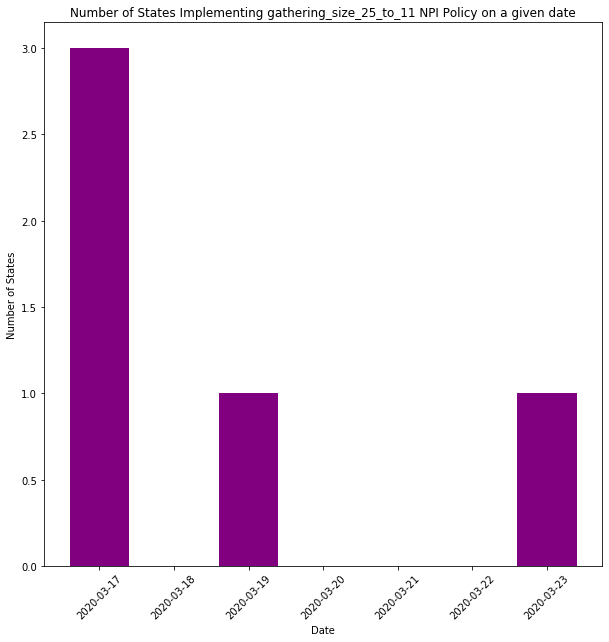

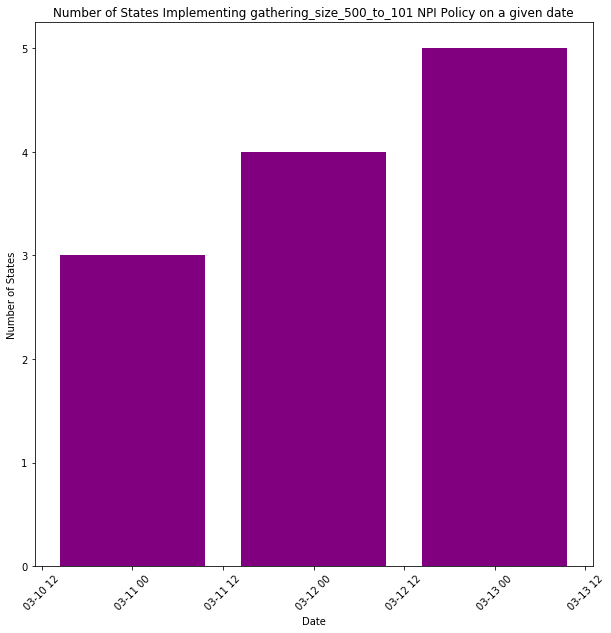

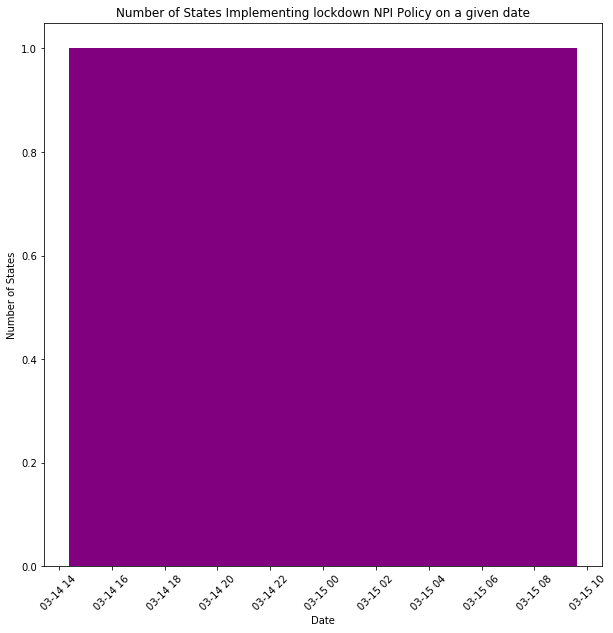

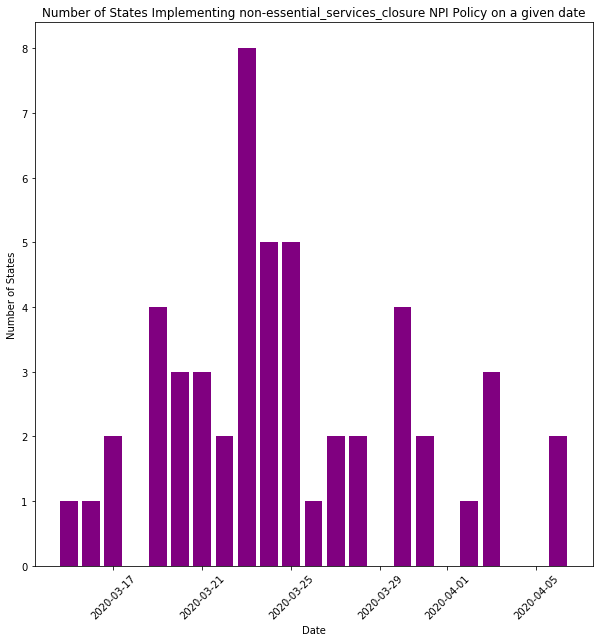

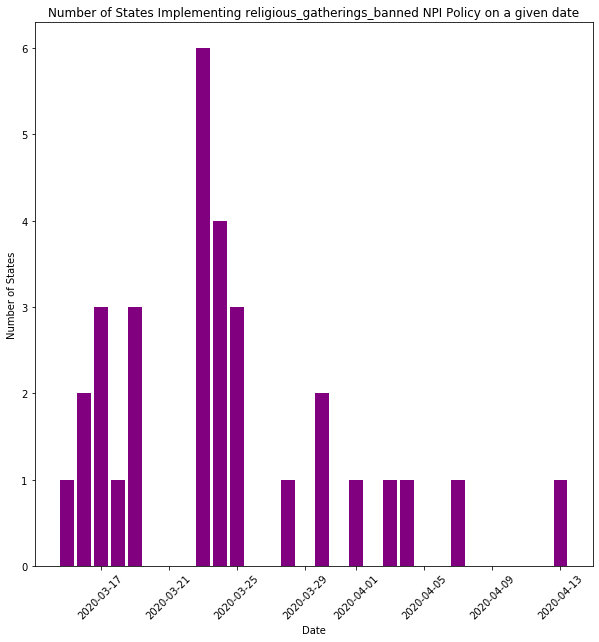

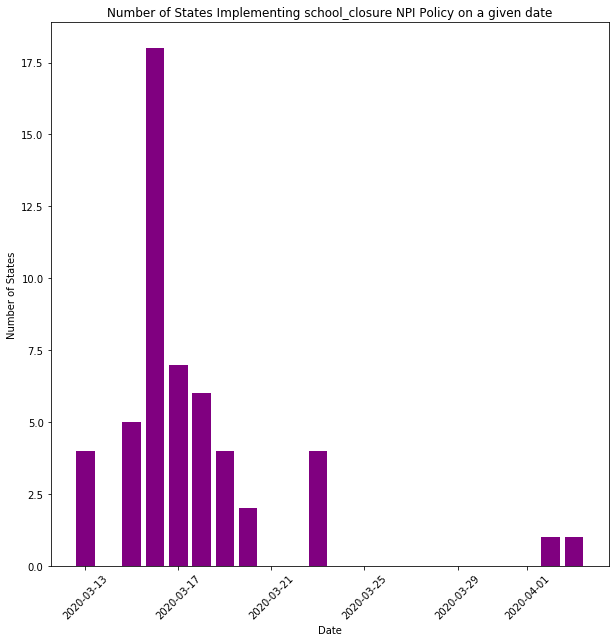

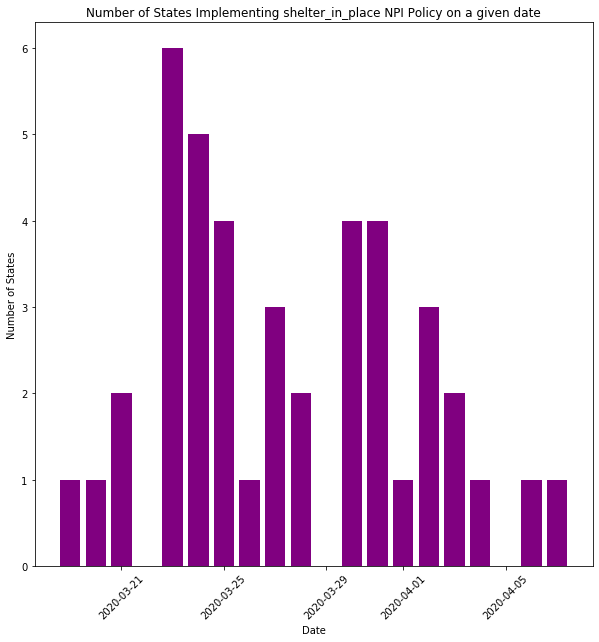

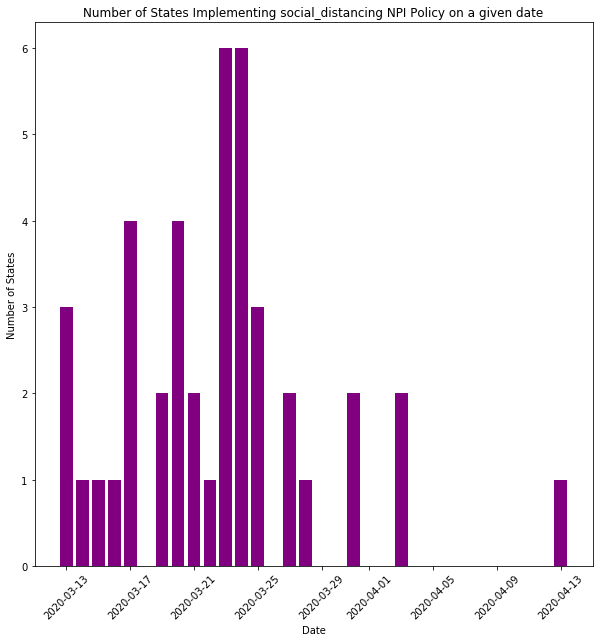

In [11]:
for col in state_level.columns.tolist():
    temp_df = state_level.reset_index().groupby(col).state.count()

    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    # Add x-axis and y-axis
    ax.bar(temp_df.index.values,
           temp_df.values,
           color='purple')

    # Set title and labels for axes
    ax.set(xlabel="Date",
           ylabel="Number of States",
           title=f"Number of States Implementing {col} NPI Policy on a given date")

    # Rotate tick marks on x-axis
    plt.setp(ax.get_xticklabels(), rotation=45)

    plt.show()

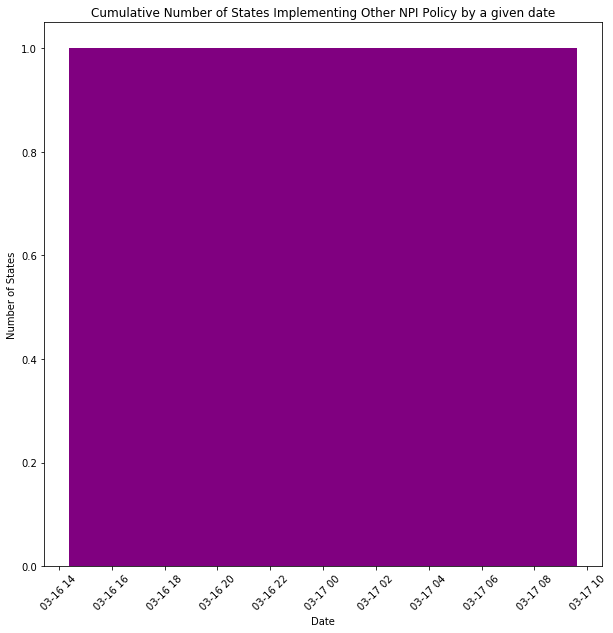

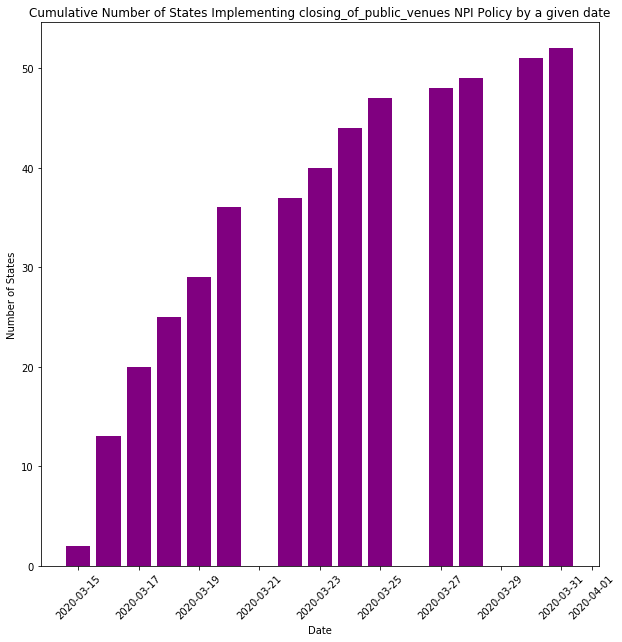

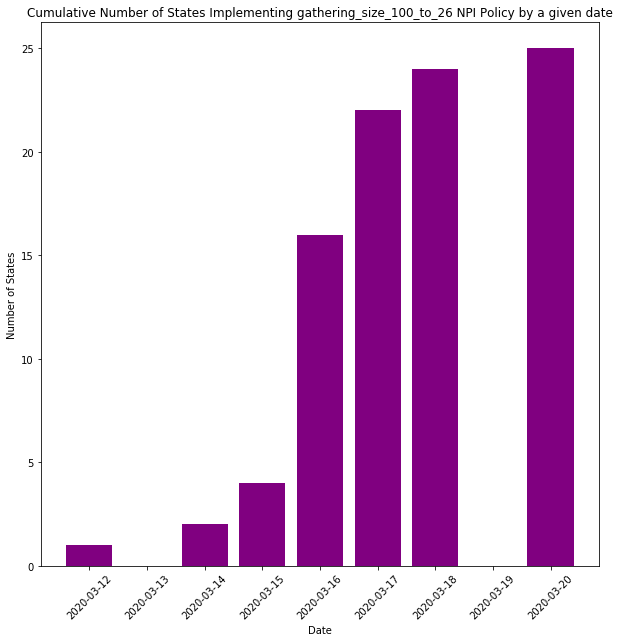

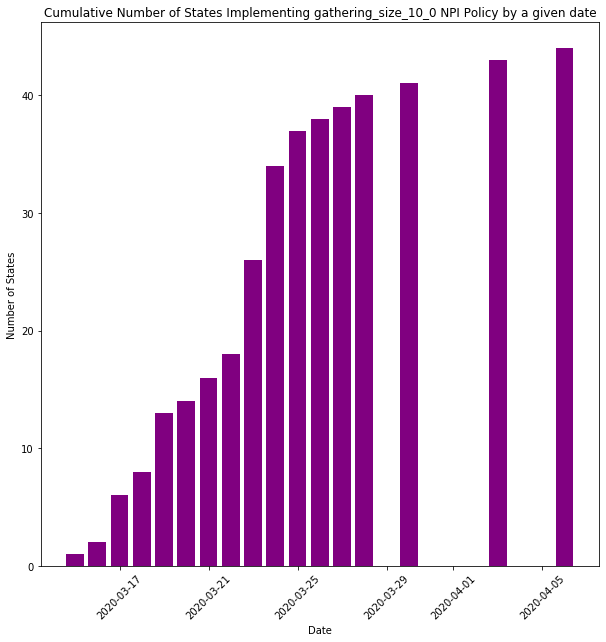

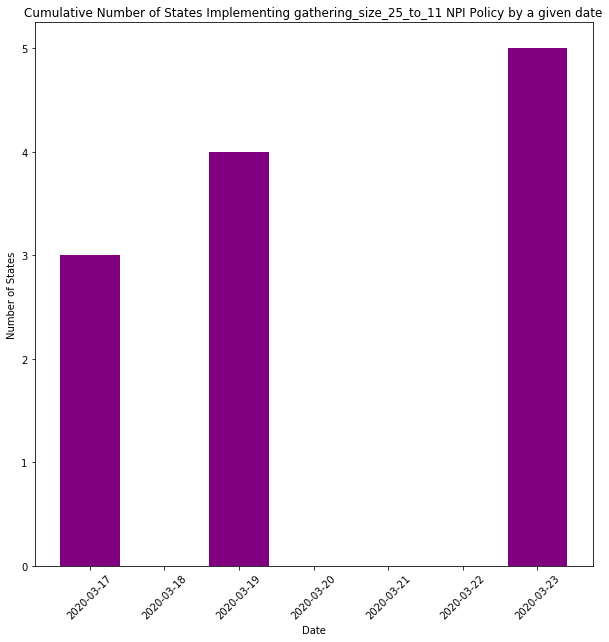

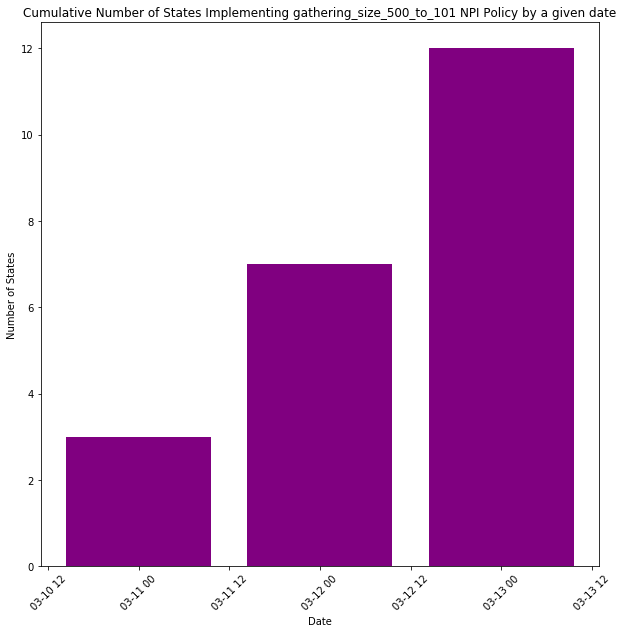

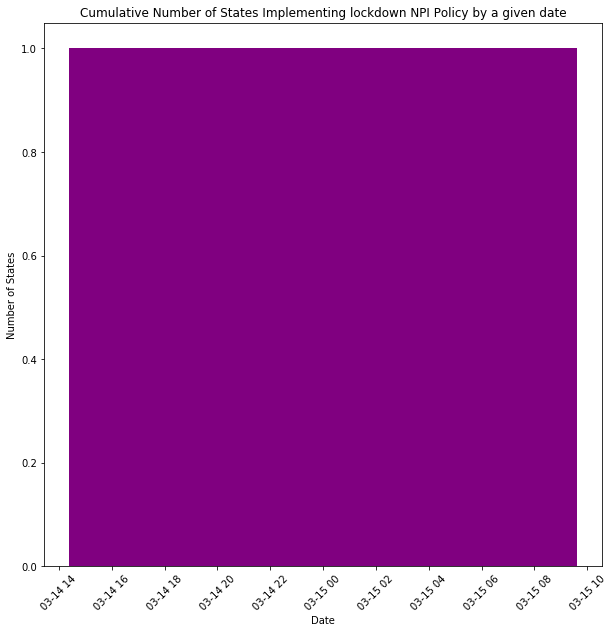

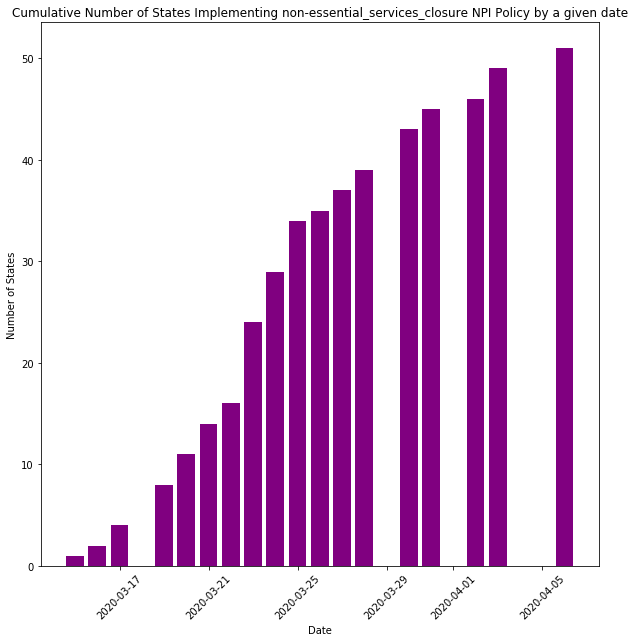

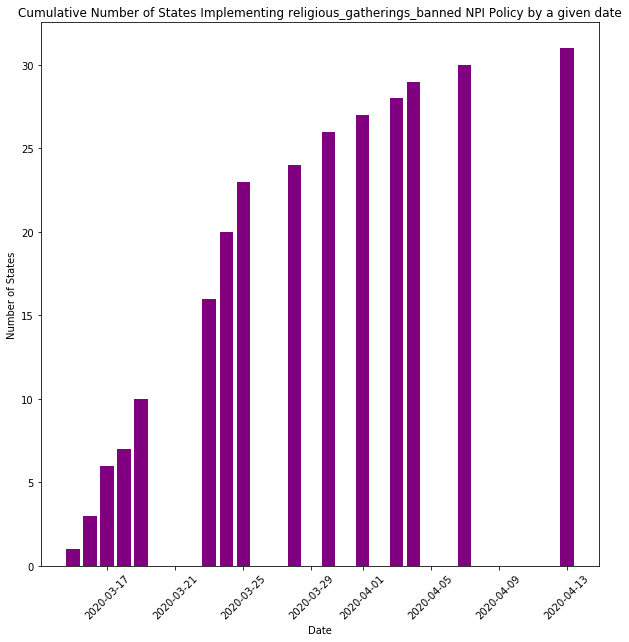

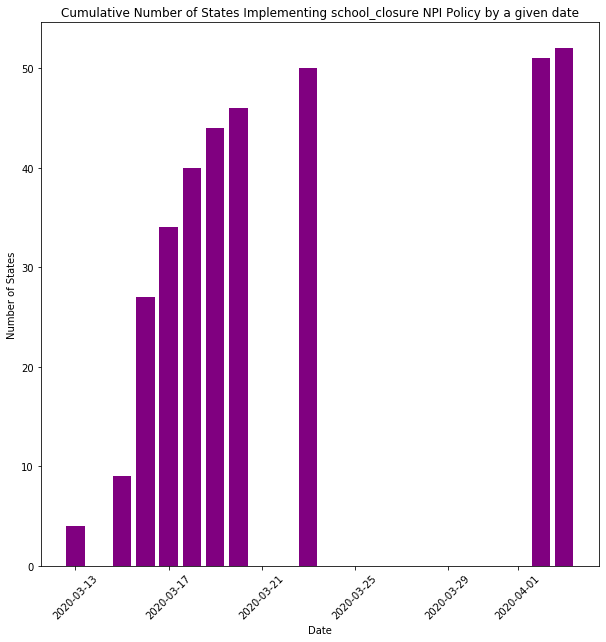

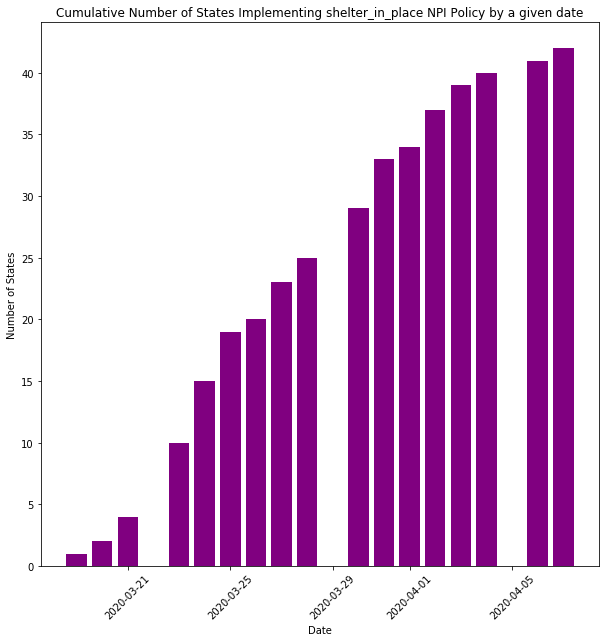

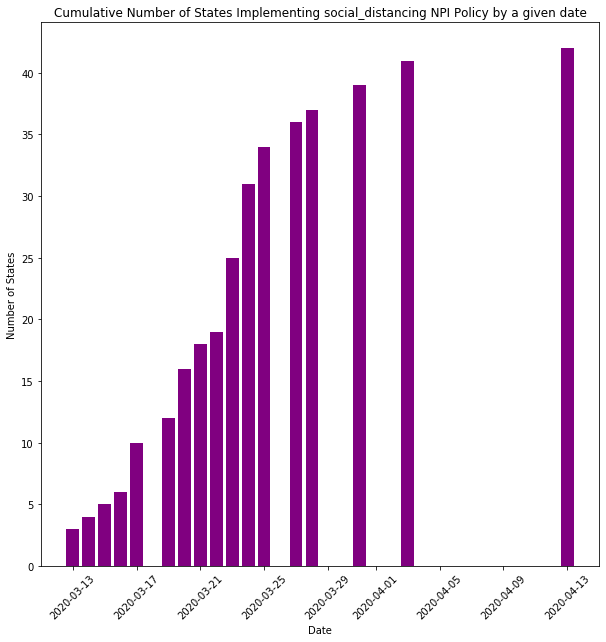

In [12]:
for col in state_level.columns.tolist():
    temp_df = state_level.reset_index().groupby(col).state.count().cumsum()

    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    # Add x-axis and y-axis
    ax.bar(temp_df.index.values,
           temp_df.values,
           color='purple')

    # Set title and labels for axes
    ax.set(xlabel="Date",
           ylabel="Number of States",
           title=f"Cumulative Number of States Implementing {col} NPI Policy by a given date")

    # Rotate tick marks on x-axis
    plt.setp(ax.get_xticklabels(), rotation=45)

    plt.show()